https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/warp_affine/warp_affine.html#warp-affine

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

In [3]:
PROJECT_PATH = os.getcwd().replace("notebooks","")
DATA_PATH = os.path.join(PROJECT_PATH, "data")
SAMPLES_PATH = os.path.join(DATA_PATH, "samples")
TRAIN_SAMPLES_PATH = os.path.join(SAMPLES_PATH, "train")
TEST_SAMPLES_PATH = os.path.join(SAMPLES_PATH, "test")
LABELS_PATH = os.path.join(DATA_PATH, "labels")
TRAIN_LABELS_PATH = os.path.join(LABELS_PATH, "train")
TEST_LABELS_PATH = os.path.join(LABELS_PATH, "test")

In [9]:
img_path = os.path.join(TRAIN_SAMPLES_PATH, np.random.choice(os.listdir(TRAIN_SAMPLES_PATH)))
img =  cv2.imread(img_path)
print(f"Image shape: {img.shape}")

Image shape: (512, 512, 3)


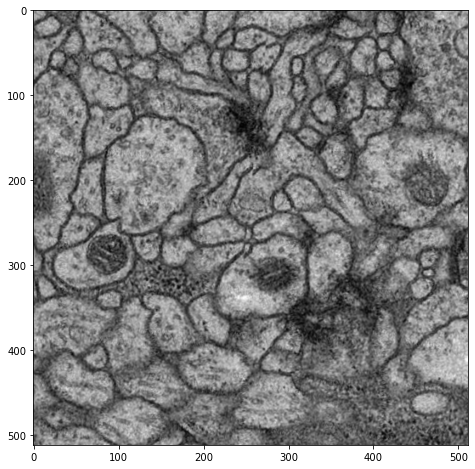

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
plt.show()

In [25]:
img[:,:,1]

array([[182, 166, 148, ..., 163, 169, 174],
       [174, 157, 137, ..., 168, 173, 178],
       [161, 144, 124, ..., 162, 173, 171],
       ...,
       [133, 134, 115, ...,  80,  92,  94],
       [115, 112,  97, ...,  84,  99, 112],
       [ 86,  90,  95, ...,  65,  80, 107]], dtype=uint8)

In [10]:
pil_img = Image.open(img_path)

In [17]:
img[:,:,0]

array([[182, 166, 148, ..., 163, 169, 174],
       [174, 157, 137, ..., 168, 173, 178],
       [161, 144, 124, ..., 162, 173, 171],
       ...,
       [133, 134, 115, ...,  80,  92,  94],
       [115, 112,  97, ...,  84,  99, 112],
       [ 86,  90,  95, ...,  65,  80, 107]], dtype=uint8)

In [19]:
np.array(pil_img)

array([[182, 166, 148, ..., 163, 169, 174],
       [174, 157, 137, ..., 168, 173, 178],
       [161, 144, 124, ..., 162, 173, 171],
       ...,
       [133, 134, 115, ...,  80,  92,  94],
       [115, 112,  97, ...,  84,  99, 112],
       [ 86,  90,  95, ...,  65,  80, 107]], dtype=uint8)

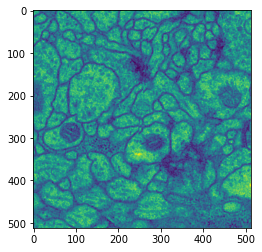

In [14]:
plt.imshow(pil_img)

In [13]:
np.array(pil_img).shape

(512, 512)

In [26]:
cv2.imshow("img", img)

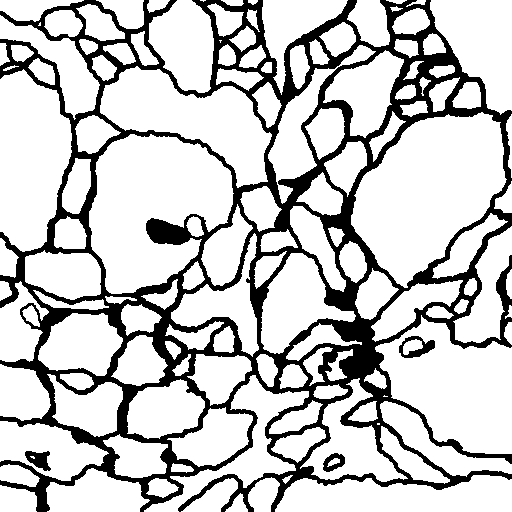

In [ ]:
cv2_imshow(image_label[:,:,0])

In [ ]:
from copy import deepcopy

In [ ]:
alpha = None
sigma = None
# Random Affine
alpha_affine = image_train.shape[1]*0.16
random_state = None 
image = deepcopy(image_train)

if random_state == None:
  randon_state = np.random.RandomState(None)

shape = image.shape
print(f"Image shape : {image.shape}")
# print(type(shape))
shape_size = shape[:2]
print(f"Shape size : {shape_size}")
print(f"alpha : {alpha}, sigma : {sigma}, alpha_affine : {alpha_affine}")

Image shape : (512, 512, 3)
Shape size : (512, 512)
alpha : None, sigma : None, alpha_affine : 81.92


In [ ]:
# find center of image
center_square = np.float32(shape_size) // 2
print("Center square : ", center_square)
print(center_square.shape)

Center square :  [256. 256.]
(2,)


In [ ]:
# square size 
square_size = min(shape_size) // 3
print("Square size : ", square_size)

Square size :  170


In [ ]:
center_square +  square_size, [center_square[0] + square_size, center_square[1] - square_size], center_square - square_size

(array([426., 426.], dtype=float32),
 [426.0, 86.0],
 array([86., 86.], dtype=float32))

In [ ]:
# Affine tranformation will generate transformation matrix when provided with 3 points in original image and 3 points in transformed image
pts1 = np.float32(
    [center_square + square_size, [center_square[0] + square_size, center_square[1] - square_size], center_square - square_size])
print("\npts1 : ")
print(pts1)
print(pts1.shape)


pts1 : 
[[426. 426.]
 [426.  86.]
 [ 86.  86.]]
(3, 2)


In [ ]:
alpha_tranform = np.random.uniform(-alpha_affine, alpha_affine, size = pts1.shape).astype(np.float32)
print(f"\nalpha tranform : {alpha_tranform}")
pts2 = pts1 + alpha_tranform
print("\npts2 : ")
print(pts2)
print(pts2.shape)


alpha tranform : [[-54.657066  18.92457 ]
 [-64.95839   63.055676]
 [-21.206488 -34.77071 ]]

pts2 : 
[[371.34293 444.92456]
 [361.04163 149.05568]
 [ 64.79351  51.22929]]
(3, 2)


In [ ]:
# get transformation matrix
M = cv2.getAffineTransform(pts1, pts2)
print(f"\nM : {M}, \n shape of M : {M.shape}")
# print(type(M))


M : [[ 8.71317987e-01  3.02979413e-02 -1.27454594e+01]
 [ 2.87724674e-01  8.70202592e-01 -4.83524549e+01]], 
 shape of M : (2, 3)


In [ ]:
transformed_image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)
print(f"\nTransformaed Image shape : {transformed_image.shape}")


Transformaed Image shape : (512, 512, 3)


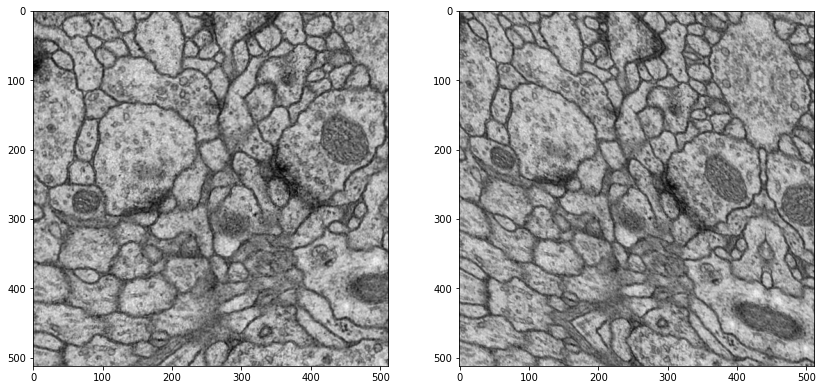

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (14,7))
axs[0].imshow(image, cmap = 'gray')
axs[1].imshow(transformed_image, cmap = 'gray') 

In [ ]:
# get transformation matrix
M = cv2.getAffineTransform(pts1, pts2)
print(f"\nM : {M}, \n shape of M : {M.shape}")
# print(type(M))

# print(shape_size[::-1])
# apply transformation




# plt.figure(figsize = (16,14))
# plt.imshow(np.c_[np.r_[image], np.r_[transformed_image]], cmap='gray')


# cv2_imshow(image)
# cv2_imshow(transformed_image)
# plt.imshow(np.c_[image, transformed_image])

NameError: ignored

In [ ]:
def elastic_transformation(image, alpha, sigma, alpha_affine, random_state=None):
  if random_state == None:
    randon_state = np.random.RandomState(None)

  shape = image.shape
  print(f"Image shape : {image.shape}")
  # print(type(shape))
  shape_size = shape[:2]
  print(f"Shape size : {shape_size}")
  print(f"alpha : {alpha}, sigma : {sigma}, alpha_affine : {alpha_affine}")

  # Random Affine
  
  # find center of image
  center_square = np.float32(shape_size) // 2
  print("Center square : ", center_square)
  # print(center_square.shape)

  # square size 
  square_size = min(shape_size) // 3
  print("Square size : ", square_size)
  # print(square_size.shape)

  # Affine tranformation will generate transformation matrix when provided with 3 points in original image and 3 points in transformed image
  pts1 = np.float32([center_square + square_size, [center_square[0] + square_size, center_square[1] - square_size], center_square - square_size])
  print("\npts1 : ")
  print(pts1)
  print(pts1.shape)

  alpha_tranform = random_state.uniform(-alpha_affine, alpha_affine, size = pts1.shape).astype(np.float32)
  print(f"\nalpha tranform : {alpha_tranform}")
  pts2 = pts1 + alpha_tranform
  print("\npts2 : ")
  print(pts2)
  print(pts2.shape)

  # get transformation matrix
  M = cv2.getAffineTransform(pts1, pts2)
  print(f"\nM : {M}, \n shape of M : {M.shape}")
  # print(type(M))

  # print(shape_size[::-1])
  # apply transformation

  transformed_image = cv2.warpAffine(image, M, shape_size[::-1], borderMode=cv2.BORDER_REFLECT_101)
  print(f"\nTransformaed Image shape : {transformed_image.shape}")

  fig, axs = plt.subplots(1,2, figsize = (14,7))
  # cv2_imshow(image, ax= axs[0])
  axs[0].imshow(image, cmap = 'gray')
  axs[1].imshow(transformed_image, cmap = 'gray') 
  # plt.figure(figsize = (16,14))
  # plt.imshow(np.c_[np.r_[image], np.r_[transformed_image]], cmap='gray')


  # cv2_imshow(image)
  # cv2_imshow(transformed_image)
  # plt.imshow(np.c_[image, transformed_image])

Image shape : (512, 512)
Shape size : (512, 512)
alpha : 1024, sigma : 40.96, alpha_affine : 40.96
Center square :  [256. 256.]
Square size :  170

pts1 : 
[[426. 426.]
 [426.  86.]
 [ 86.  86.]]
(3, 2)

alpha tranform : [[ -6.7975574  18.048983 ]
 [-40.95063   -16.192915 ]
 [-28.937757  -33.395622 ]]

pts2 : 
[[419.20245  444.04898 ]
 [385.04938   69.80708 ]
 [ 57.06224   52.604378]]
(3, 2)

M : [[  0.96466805   0.10045022 -34.53793093]
 [  0.05059619   1.10071146 -46.40808065]], 
 shape of M : (2, 3)

Transformaed Image shape : (512, 512)


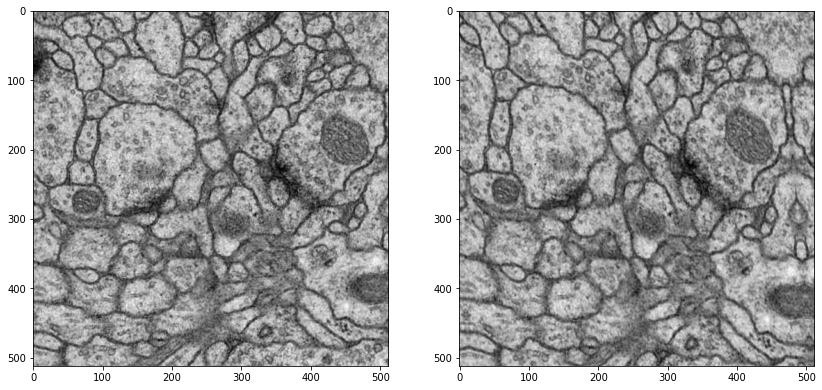

In [ ]:
elastic_transformation(image_train[:,:,0], image_train.shape[1]*2,image_train.shape[1]*0.08,3*image_train.shape[1]*0.08, np.random.RandomState(1))